In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"



# 데이터 읽기

df = pd.read_csv(url)

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:

# 결측치 확인
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [5]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [10]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [17]:
df.sex = pd.get_dummies(df.sex).values.astype(int)
df.species = pd.get_dummies(df.species).values.astype(int)
df.island = pd.get_dummies(df.island).values.astype(int)

/var/folders/tx/rw4964jj7qjgx3sd1vrtdgz00000gn/T/ipykernel_39920/3909154390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sex = pd.get_dummies(df.sex).values.astype(int)
/var/folders/tx/rw4964jj7qjgx3sd1vrtdgz00000gn/T/ipykernel_39920/3909154390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.species = pd.get_dummies(df.species).values.astype(int)
/var/folders/tx/rw4964jj7qjgx3sd1vrtdgz00000gn/T/ipykernel_39920/3909154390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [41]:
X=df.drop("species",axis=1)
X.head()


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,1
1,0,39.5,17.4,186.0,3800.0,0
2,0,40.3,18.0,195.0,3250.0,0
4,0,36.7,19.3,193.0,3450.0,0
5,0,39.3,20.6,190.0,3650.0,1


In [42]:
y=df["species"]
y.value_counts()


species
0    187
1    146
Name: count, dtype: int64

In [43]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
from sklearn.svm import SVC

clf_svm = SVC(kernel='poly', random_state=0) # poly, linear, rbf
clf_svm.fit(X_train_scaled, y_train)

pred_svm = clf_svm.predict(X_test_scaled)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.9880952380952381
[[41  1]
 [ 0 42]]


In [45]:

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(max_iter=500, random_state=0)
clf_lr.fit(X_train_scaled, y_train)

pred_lr = clf_lr.predict(X_test_scaled)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.9761904761904762
[[40  2]
 [ 0 42]]


In [46]:
from sklearn.neural_network import MLPClassifier

clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train_scaled, y_train)

pred_nn = clf_nn.predict(X_test_scaled)


print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.9880952380952381
[[41  1]
 [ 0 42]]


In [47]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(max_depth=20, min_samples_split=2, random_state=0)
clf_dt.fit(X_train_scaled, y_train)

pred_dt = clf_dt.predict(X_test_scaled)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9761904761904762
[[40  2]
 [ 0 42]]


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train_scaled, y_train)
pred = rf_clf.predict(X_test_scaled)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.9880952380952381
[[41  1]
 [ 0 42]]


In [49]:

Y = pd.get_dummies(y).values.astype(int) # 원핫인코딩

In [50]:
X = X.values # 딥러닝 입력을 위해 Numpy로 변환

In [51]:
X

array([[0.00e+00, 3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 1.00e+00],
       [0.00e+00, 3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 0.00e+00],
       [0.00e+00, 4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 0.00e+00],
       ...,
       [1.00e+00, 5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 1.00e+00],
       [1.00e+00, 4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 0.00e+00],
       [1.00e+00, 4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 1.00e+00]])

In [52]:
y

0      1
1      1
2      1
4      1
5      1
      ..
338    0
340    0
341    0
342    0
343    0
Name: species, Length: 333, dtype: int64

In [53]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='relu')) #input_shape은 x칼럼수
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(learning_rate=0.04),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226 (904.00 B)

 Trainable params: 226 (904.00 B)

 Non-trainable params: 0 (0.00 B)

In [59]:
import numpy as np
model_history=model.fit(x=X_train_scaled, y=y_train, epochs=50, batch_size=32,validation_data= (X_test_scaled,y_test))
y_pred = model.predict(X_test_scaled)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6126 - loss: 0.5492 - val_accuracy: 0.9552 - val_loss: 0.4110
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.2546 - val_accuracy: 0.9851 - val_loss: 0.3137
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9908 - loss: 0.2046 - val_accuracy: 1.0000 - val_loss: 0.2331
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.1342 - val_accuracy: 0.9851 - val_loss: 0.1931
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9984 - loss: 0.1101 - val_accuracy: 0.9851 - val_loss: 0.1610
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9793 - loss: 0.1187 - val_accuracy: 0.9552 - val_loss: 0.1817
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9819 - loss: 0.0970 - val_accuracy: 0.9851 - val_loss: 0.1276
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9786 - loss: 0.1229 - val_accuracy: 0.9851 - val_loss: 0.1074
Epoch 9/

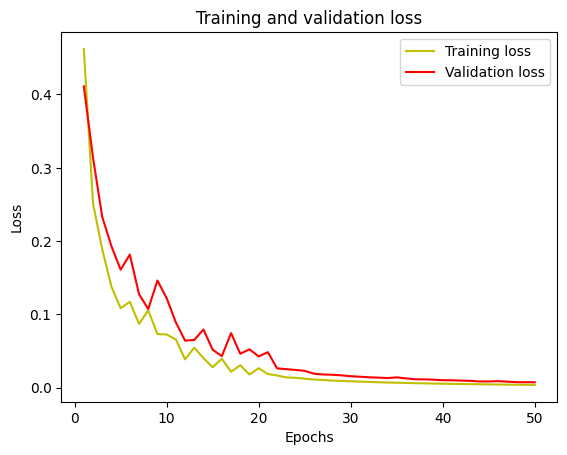

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

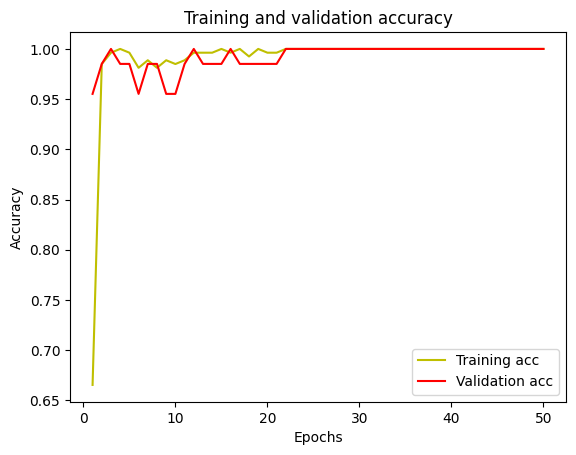

In [61]:

acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        39

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

[[28  0]
 [ 0 39]]
